In [1]:
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import metrics

In [4]:
columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('diabetes.csv', names=columns)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
X = df.iloc[: , 0:8]
y = df.label
print(X, y)

     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age
0           6      148  72    35        0  33.6     0.627   50
1           1       85  66    29        0  26.6     0.351   31
2           8      183  64     0        0  23.3     0.672   32
3           1       89  66    23       94  28.1     0.167   21
4           0      137  40    35      168  43.1     2.288   33
..        ...      ...  ..   ...      ...   ...       ...  ...
763        10      101  76    48      180  32.9     0.171   63
764         2      122  70    27        0  36.8     0.340   27
765         5      121  72    23      112  26.2     0.245   30
766         1      126  60     0        0  30.1     0.349   47
767         1       93  70    31        0  30.4     0.315   23

[768 rows x 8 columns] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64


In [29]:
X_train, X_test, y_train, y_test = tts(X, y, random_state=1, test_size=0.3)

In [30]:
dt = DecisionTreeClassifier()

dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
y_pred = dt.predict(X_test)

In [32]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


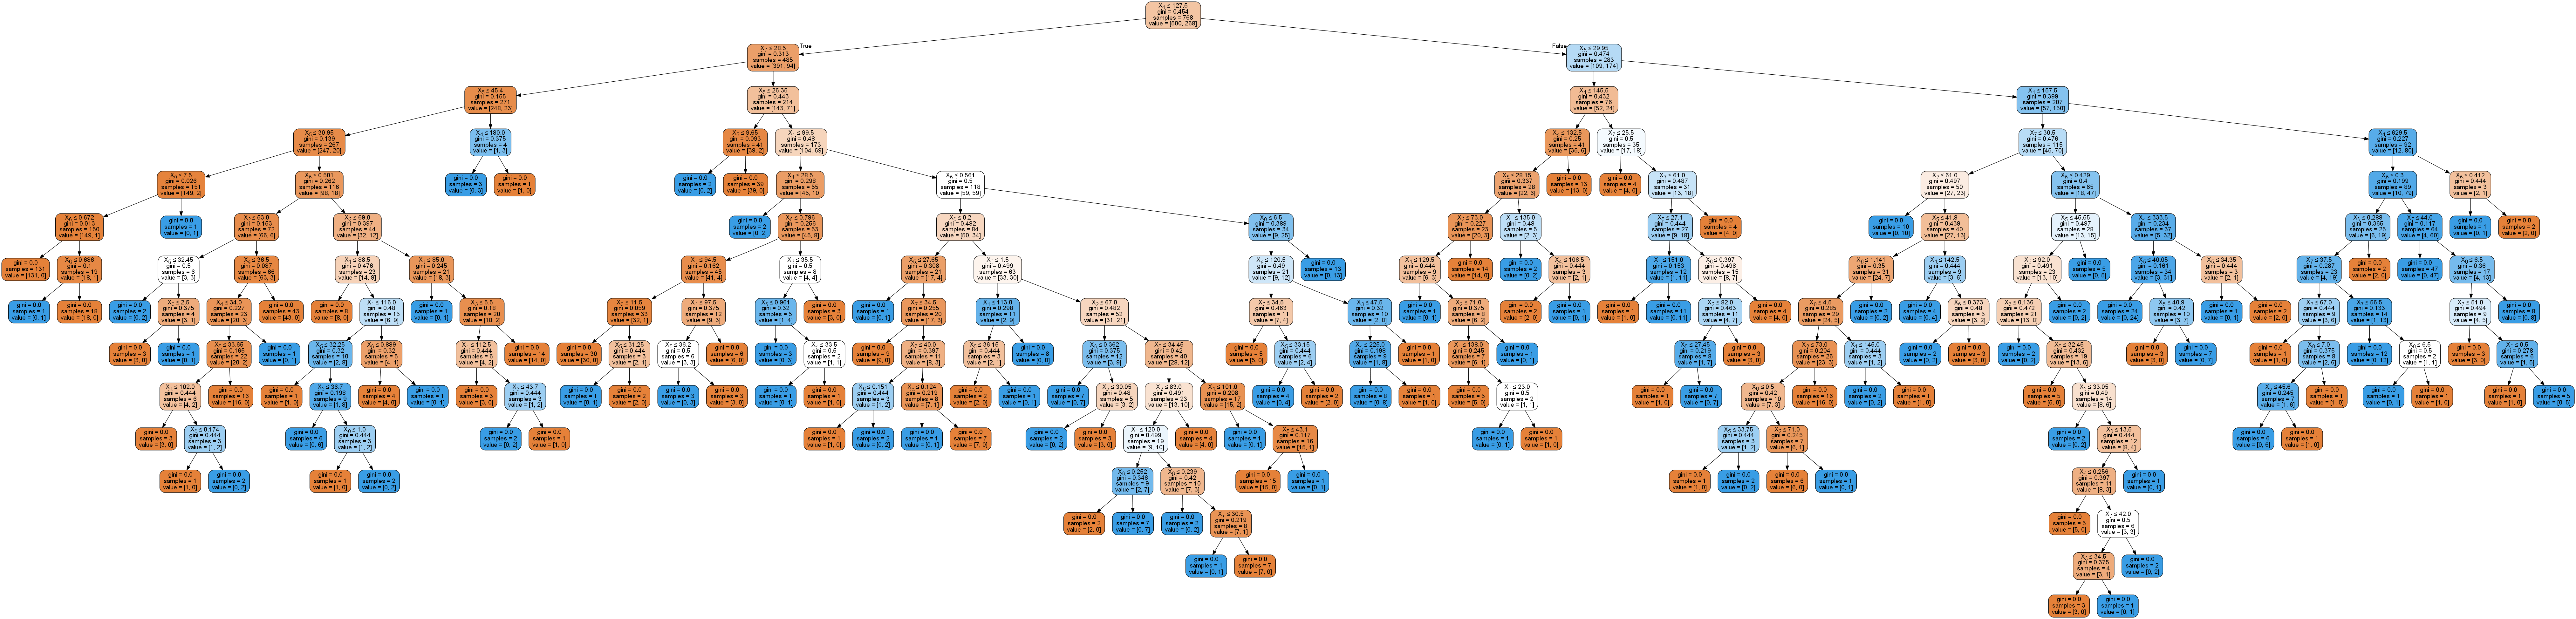

In [37]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())